In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/smart-crop-recommendation-dataset/data/crop-yield.csv


In [2]:
df = pd.read_csv("/kaggle/input/smart-crop-recommendation-dataset/data/crop-yield.csv")

In [3]:
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N                           10000 non-null  int64  
 1   P                           10000 non-null  int64  
 2   K                           10000 non-null  int64  
 3   Soil_pH                     10000 non-null  float64
 4   Soil_Moisture               10000 non-null  float64
 5   Soil_Type                   10000 non-null  object 
 6   Organic_Carbon              10000 non-null  float64
 7   Temperature                 10000 non-null  float64
 8   Humidity                    10000 non-null  float64
 9   Rainfall                    10000 non-null  float64
 10  Sunlight_Hours              10000 non-null  float64
 11  Wind_Speed                  10000 non-null  float64
 12  Region                      10000 non-null  object 
 13  Altitude                    1000

In [5]:
df.isnull().sum()

N                             0
P                             0
K                             0
Soil_pH                       0
Soil_Moisture                 0
Soil_Type                     0
Organic_Carbon                0
Temperature                   0
Humidity                      0
Rainfall                      0
Sunlight_Hours                0
Wind_Speed                    0
Region                        0
Altitude                      0
Season                        0
Crop_Type                     0
Irrigation_Type               0
Fertilizer_Used               0
Pesticide_Used                0
Crop_Yield_ton_per_hectare    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,10000.0,104.983000,43.291654,30.00,68.0000,105.00,142.0000,179.00
P,10000.0,56.809600,24.522962,15.00,35.0000,57.00,78.0000,99.00
K,10000.0,85.008700,37.541443,20.00,52.0000,85.00,118.0000,149.00
Soil_pH,10000.0,6.504306,0.978698,4.80,5.6700,6.52,7.3500,8.20
Soil_Moisture,10000.0,40.083748,14.461944,15.00,27.6300,40.00,52.7625,64.99
Organic_Carbon,10000.0,0.958356,0.375027,0.30,0.6300,0.96,1.2900,1.60
Temperature,10000.0,25.097402,8.719031,10.00,17.5900,24.97,32.8300,40.00
Humidity,10000.0,59.894209,17.402450,30.01,44.8300,59.55,75.0375,89.99
Rainfall,10000.0,1546.694887,718.865960,300.70,925.7675,1548.55,2165.4525,2799.26
Sunlight_Hours,10000.0,7.507868,2.006472,4.00,5.7700,7.53,9.2200,11.00


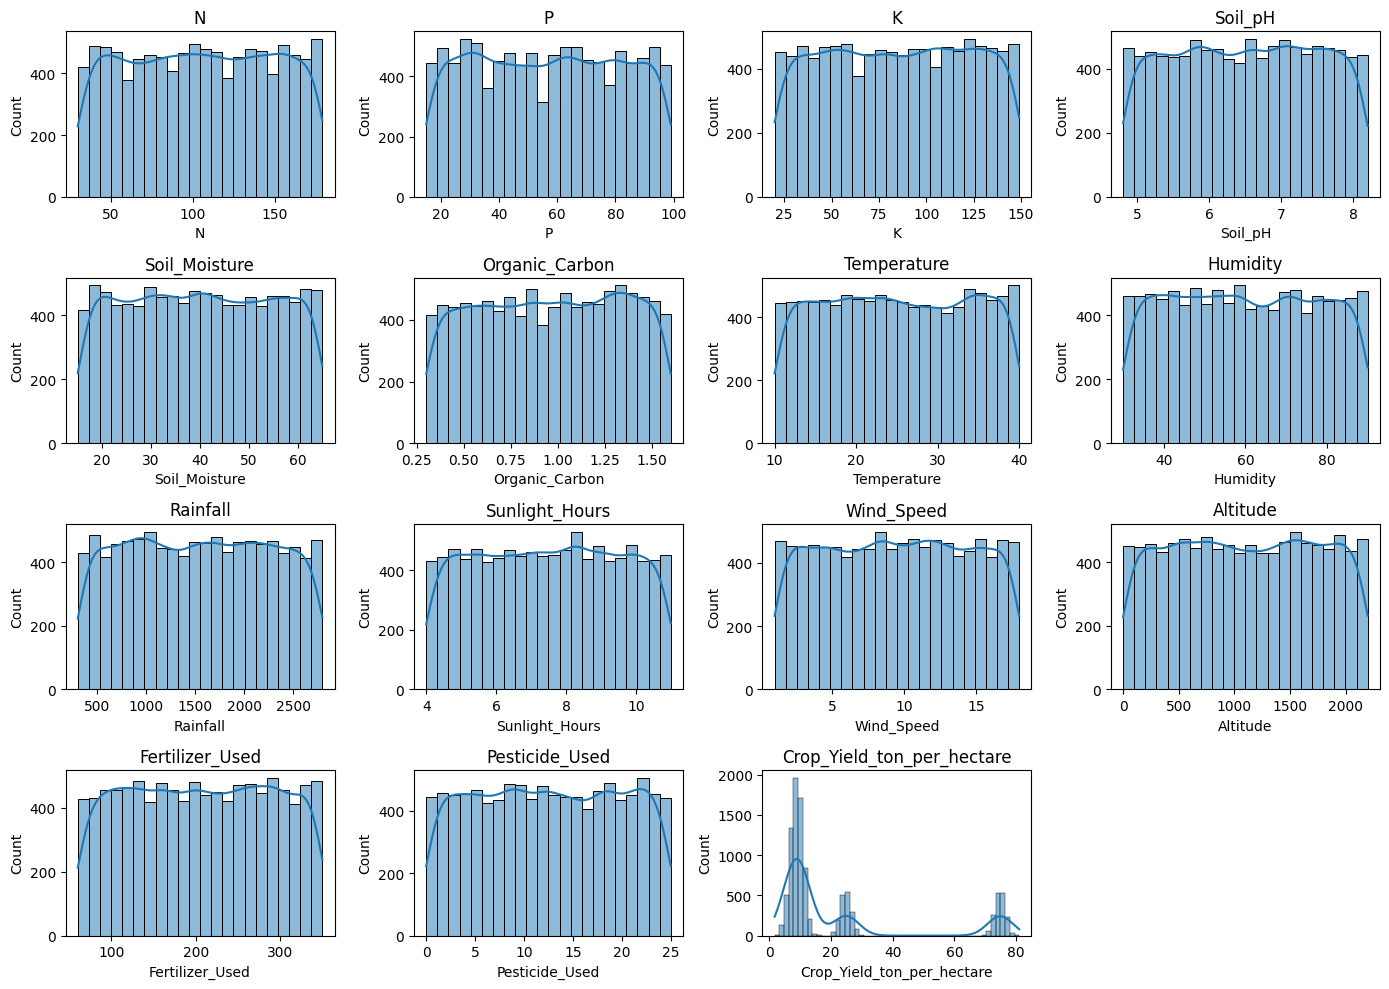

In [8]:
cols=df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(14,10))
for i,col in enumerate(cols,1):
  plt.subplot(4,4,i)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

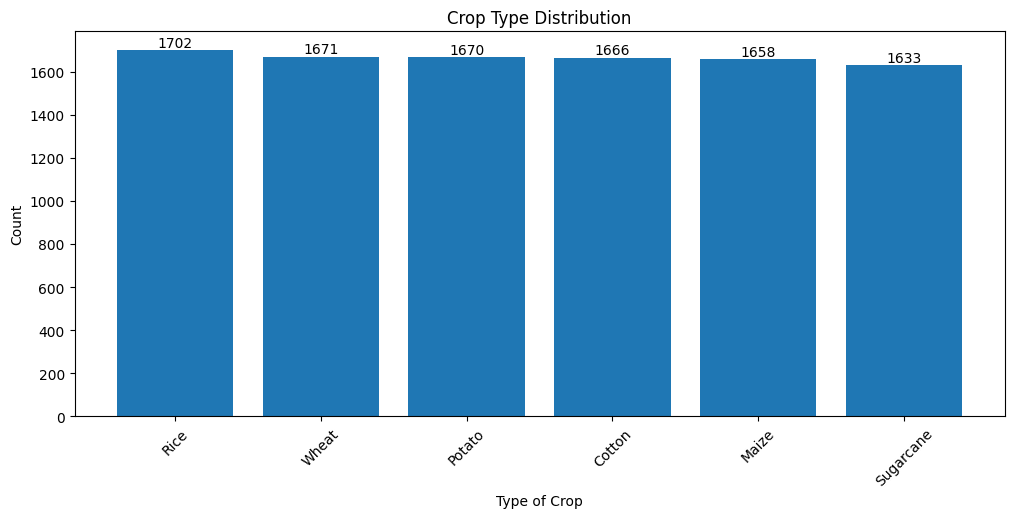

In [9]:
crop_counts = df['Crop_Type'].value_counts()

plt.figure(figsize=(12,5))
plt.bar(crop_counts.index, crop_counts.values)

for i, v in enumerate(crop_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel("Type of Crop")
plt.ylabel("Count")
plt.title("Crop Type Distribution")
plt.xticks(rotation=45)
plt.show()

In [10]:
df['Crop_Type'].value_counts()

Crop_Type
Rice         1702
Wheat        1671
Potato       1670
Cotton       1666
Maize        1658
Sugarcane    1633
Name: count, dtype: int64

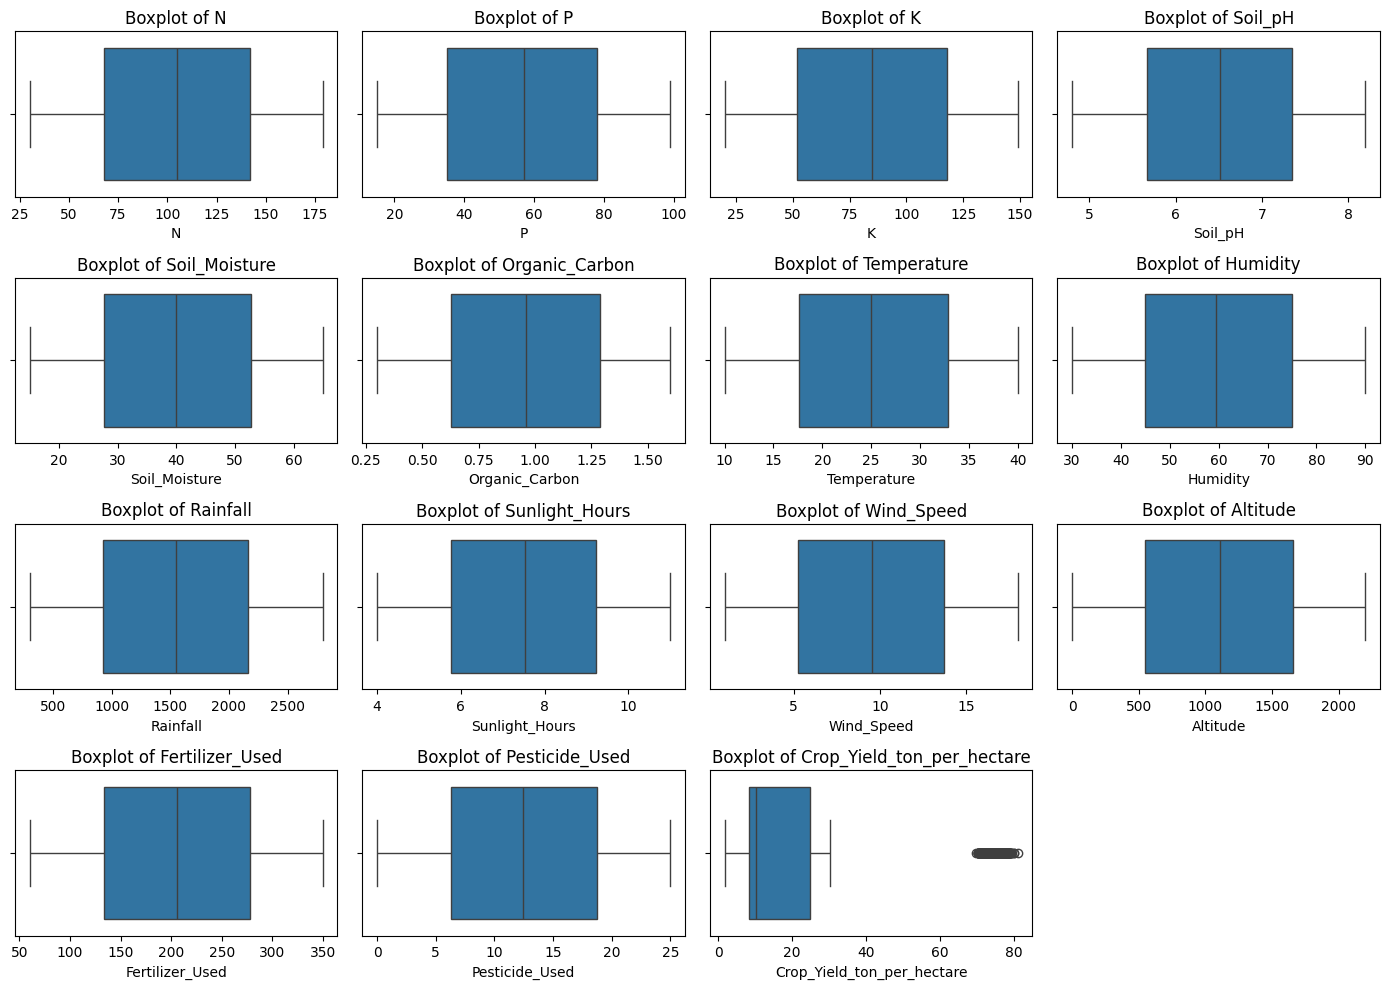

In [11]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(14,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [12]:
q1 = df['Crop_Yield_ton_per_hectare'].quantile(0.25)
q3 = df['Crop_Yield_ton_per_hectare'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['Crop_Yield_ton_per_hectare']=np.where(df['Crop_Yield_ton_per_hectare']<lower,lower,np.where(df['Crop_Yield_ton_per_hectare']>upper,upper,df['Crop_Yield_ton_per_hectare']))


<Axes: ylabel='Crop_Yield_ton_per_hectare'>

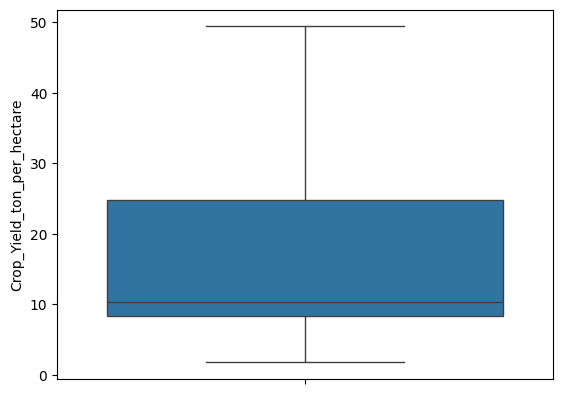

In [13]:
sns.boxplot(df['Crop_Yield_ton_per_hectare'])

In [14]:
cat_col=df.select_dtypes(include='object').columns
for col in cat_col:
  print(df[col].value_counts())
  print("-"*50)

Soil_Type
Loamy    2543
Sandy    2496
Silt     2494
Clay     2467
Name: count, dtype: int64
--------------------------------------------------
Region
South      2013
East       2006
North      2003
West       1996
Central    1982
Name: count, dtype: int64
--------------------------------------------------
Season
Rabi      3355
Kharif    3350
Zaid      3295
Name: count, dtype: int64
--------------------------------------------------
Crop_Type
Rice         1702
Wheat        1671
Potato       1670
Cotton       1666
Maize        1658
Sugarcane    1633
Name: count, dtype: int64
--------------------------------------------------
Irrigation_Type
Drip         2532
Canal        2529
Rainfed      2507
Sprinkler    2432
Name: count, dtype: int64
--------------------------------------------------


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Crop_Type',axis=1),df['Crop_Type'],test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['Soil_Type','Region','Season','Irrigation_Type']

for col in label_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])

In [17]:
le_y=LabelEncoder()
y_train=le_y.fit_transform(y_train)
y_test=le_y.transform(y_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy : 0.6395
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       340
           1       0.51      0.59      0.55       335
           2       1.00      1.00      1.00       316
           3       0.33      0.32      0.32       328
           4       1.00      1.00      1.00       333
           5       0.35      0.22      0.27       348

    accuracy                           0.64      2000
   macro avg       0.63      0.64      0.63      2000
weighted avg       0.63      0.64      0.63      2000



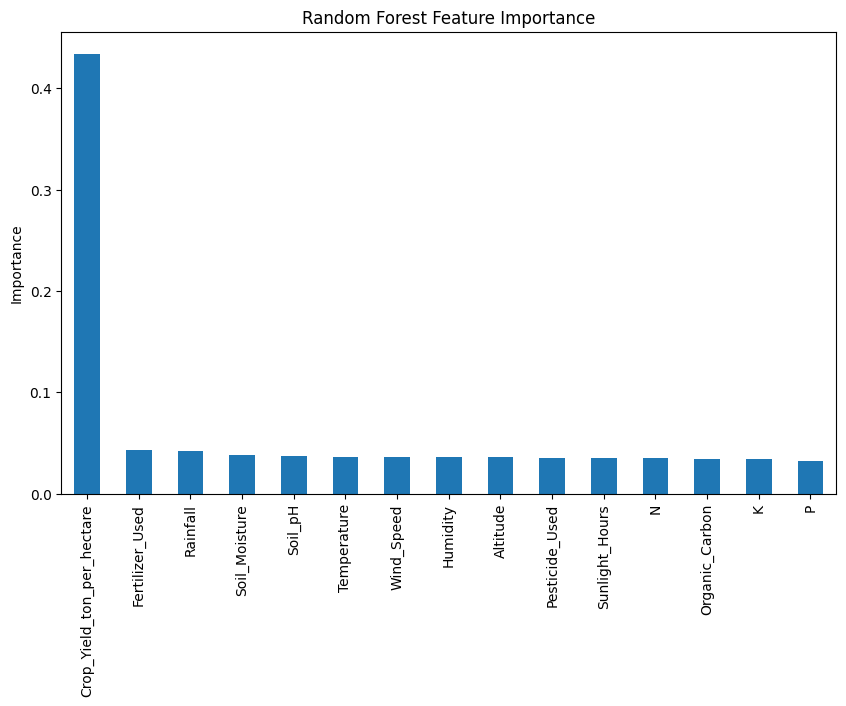

In [19]:
feat_imp=pd.Series(rf.feature_importances_,index=X_train.columns)
feat_imp=feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='bar')
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy :", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy : 0.646
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       340
           1       0.54      0.56      0.55       335
           2       1.00      0.98      0.99       316
           3       0.34      0.33      0.33       328
           4       0.99      1.00      0.99       333
           5       0.37      0.33      0.35       348

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.64      0.65      0.64      2000



<Figure size 1000x600 with 0 Axes>

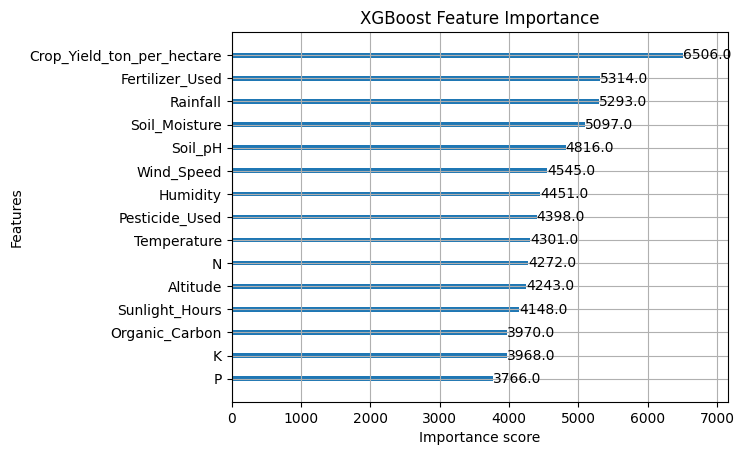

In [21]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb,max_num_features=15)
plt.title("XGBoost Feature Importance")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

2026-01-19 10:09:15.682025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768817356.021796      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768817356.118084      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768817356.909850      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768817356.909926      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768817356.909930      17 computation_placer.cc:177] computation placer alr

In [24]:
num_classes=np.unique(y_train).shape[0]

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

2026-01-19 10:09:34.741273: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,846 (93.15 KB)

 Trainable params: 23,846 (93.15 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3316 - loss: 1.4782 - val_accuracy: 0.5025 - val_loss: 0.9365
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5287 - loss: 0.9522 - val_accuracy: 0.5480 - val_loss: 0.9081
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5575 - loss: 0.9049 - val_accuracy: 0.5795 - val_loss: 0.8856
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5674 - loss: 0.8843 - val_accuracy: 0.5660 - val_loss: 0.8681
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5918 - loss: 0.8536 - val_accuracy: 0.5830 - val_loss: 0.8374
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6055 - loss: 0.8413 - val_accuracy: 0.6325 - val_loss: 0.8068
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6090 - loss: 0.8252 - val_accuracy: 0.6080 - val_loss: 0.8171
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6294 - loss: 0.8061 - val_accu

In [28]:
loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6129 - loss: 0.8902
Test Accuracy: 0.6274999976158142
